<a id='section-1'></a>
<h1 style="color:#347347;">Importing Required Libraries</h1>

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

<a id='section-2'></a>
<h1 style="color:#347347;">Data Loading</h1>

In [2]:
athletes_df = pd.read_csv('athlete_events.csv')

regions_df = pd.read_csv('noc_regions.csv')

In [3]:
# lets check the glimpse of first five rows of athletes dataframe
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# lets check the glimpse of first five rows of regions dataframe
regions_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
# shape of dataframe
print('Shape of Athlete DF {}\n'.format(athletes_df.shape))
print('Shape of Regions DF {}'.format(regions_df.shape))

Shape of Athlete DF (271116, 15)

Shape of Regions DF (230, 3)


In [6]:
# lets merge athlete events and region based on NOC
df_merged = athletes_df.merge(regions_df,on='NOC',how='left')

In [7]:
## Getting an overview of our data
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [8]:
# summary statistics
df_merged.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
# lets check for missing values
df_merged.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

# Exploratory Data Analysis

<a id='section-3.1'></a>
<h3 style="color:#F20707;">Top 10 Countries Participated in 120 years</h3>

In [43]:
# Top 10 countries participated
top_10_countries = df_merged['Team'].value_counts().nlargest(10)
top_10_countries

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: count, dtype: int64

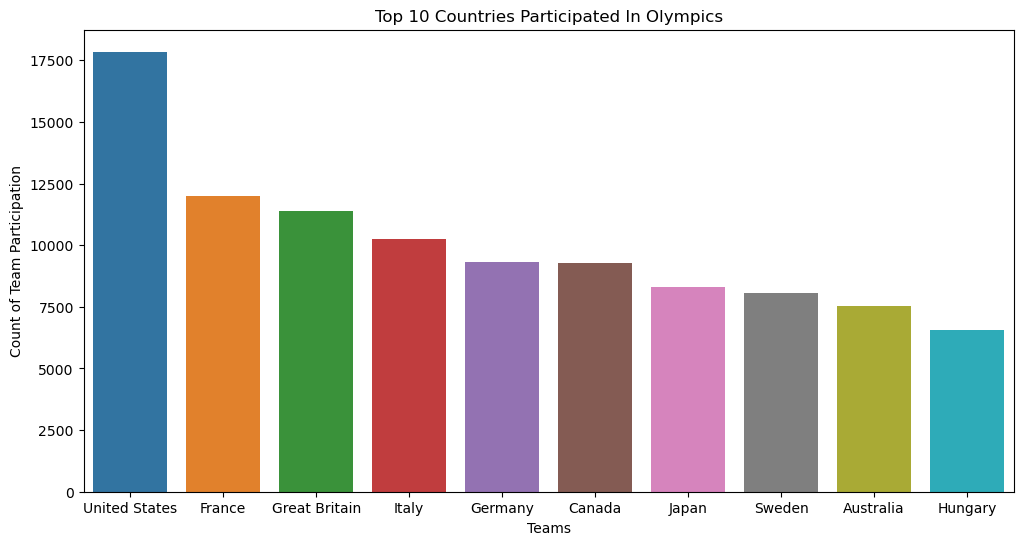

In [44]:
# plot for top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x = top_10_countries.index,y = top_10_countries)
plt.xlabel('Teams')
plt.ylabel('Count of Team Participation')
plt.title('Top 10 Countries Participated In Olympics')
plt.show()

<a id='section-3.2'></a>
<h3 style="color:#F20707;">Age Distribution of the Participants</h3>

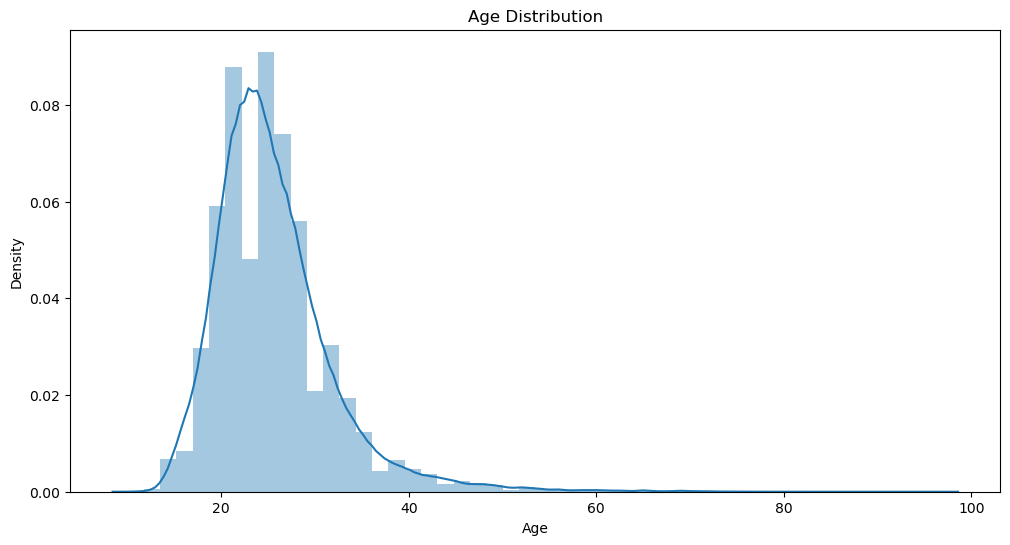

In [45]:
# Age distribution of the participants
plt.figure(figsize=(12,6))
sns.distplot(df_merged.Age)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

<a id='section-3.3'></a>
<h3 style="color:#F20707;">Different Sports in Summer and Winter Olympics</h3>

In [46]:
# winter olympic sports
winter_sports = df_merged[df_merged['Season'] == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [47]:
# summer olympic sports
summer_sports = df_merged[df_merged['Season'] == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

<a id='section-3.4'></a>
<h3 style="color:#F20707;">Total Team, Regions/NOC, Events in Summer Oympics and Winter Olympics</h3>

In [48]:
total_count = df_merged.groupby("Season")[["Team", "NOC", "Event", "City", "Sport"]].nunique().reset_index()
total_count

,Season,Team,NOC,Event,City,Sport
0,Summer,1157,230,651,23,52
1,Winter,221,119,119,19,17


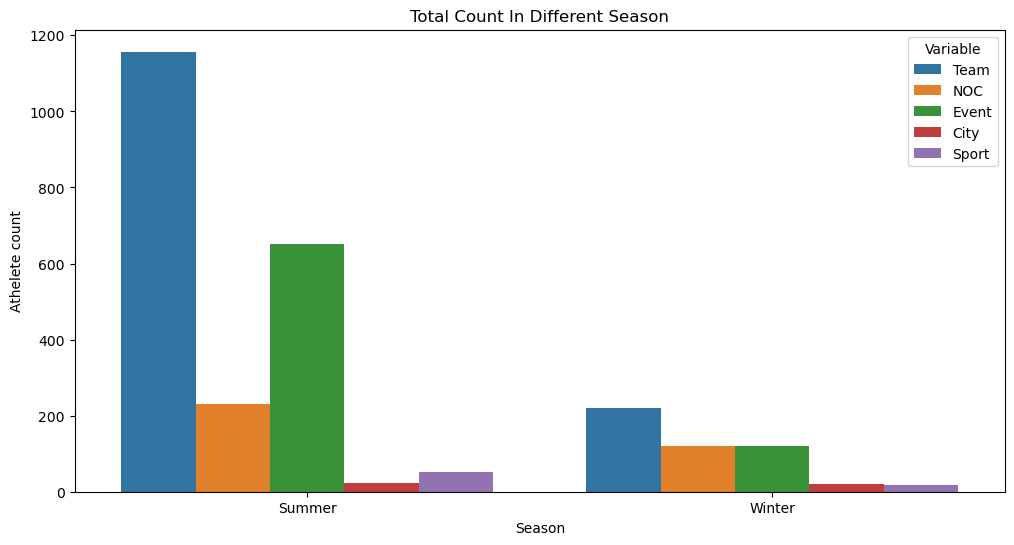

In [49]:
tidy = total_count.melt(id_vars='Season').rename(columns=str.title)

plt.subplots(figsize=(12, 6))
sns.barplot(x='Season', y='Value', hue='Variable', data=tidy)
plt.title('Total Count In Different Season')
plt.ylabel("Athelete count")
plt.show()

<a id='section-3.5'></a>
<h3 style="color:#F20707;">Participation based on Gender</h3>

In [50]:
# male and female participants
gender_counts = df_merged.Sex.value_counts()
gender_counts

Sex
M    196594
F     74522
Name: count, dtype: int64

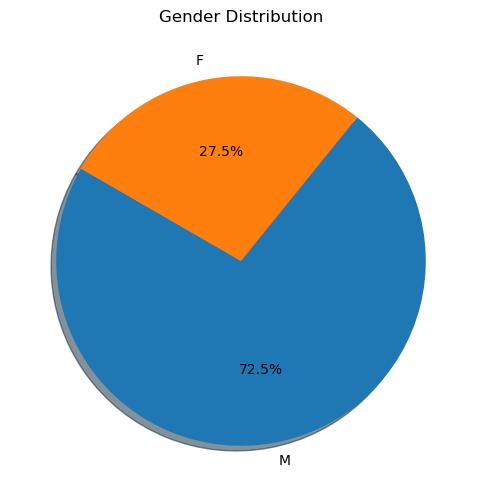

In [51]:
# pie chart for male and female participants
plt.figure(figsize=(12,6))
plt.pie(gender_counts,labels = gender_counts.index, autopct = '%1.1f%%',startangle=150,shadow=True )
plt.title('Gender Distribution')
plt.show()

<a id='section-3.6'></a>
<h3 style="color:#F20707;">Distribution According to Sex in both Season</h3>

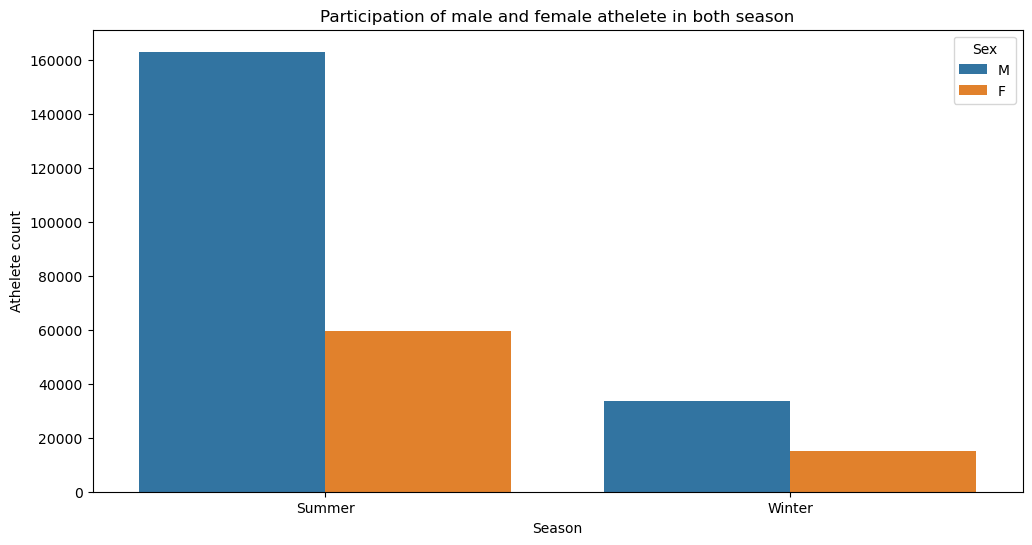

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x="Season", hue="Sex", data=df_merged)
plt.title('Participation of male and female athelete in both season')
plt.ylabel("Athelete count")
plt.show()

<a id='section-3.7'></a>
<h3 style="color:#F20707;">Medals for Top 20 Countries in Summer Olympics</h3>

In [53]:
# Total medals
df_merged.Medal.value_counts()

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

In [54]:
# Medals for Top 20 countries in summer olympics
total_medals_by_country = df_merged[df_merged['Season']=='Summer'].groupby(['region','Medal'])['Sex'].count().reset_index()
total_medals_by_country=total_medals_by_country.pivot('region','Medal','Sex').fillna(0).sort_values(by='Gold',ascending=False).head(20)
#total_medals_by_country
total_medals_by_country.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel("Athelete count")
plt.title('Medals by Country- Summer Olympics ')
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

<a id='section-3.8'></a>
<h3 style="color:#F20707;">Atheletes Participated in Summer Olympics</h3>

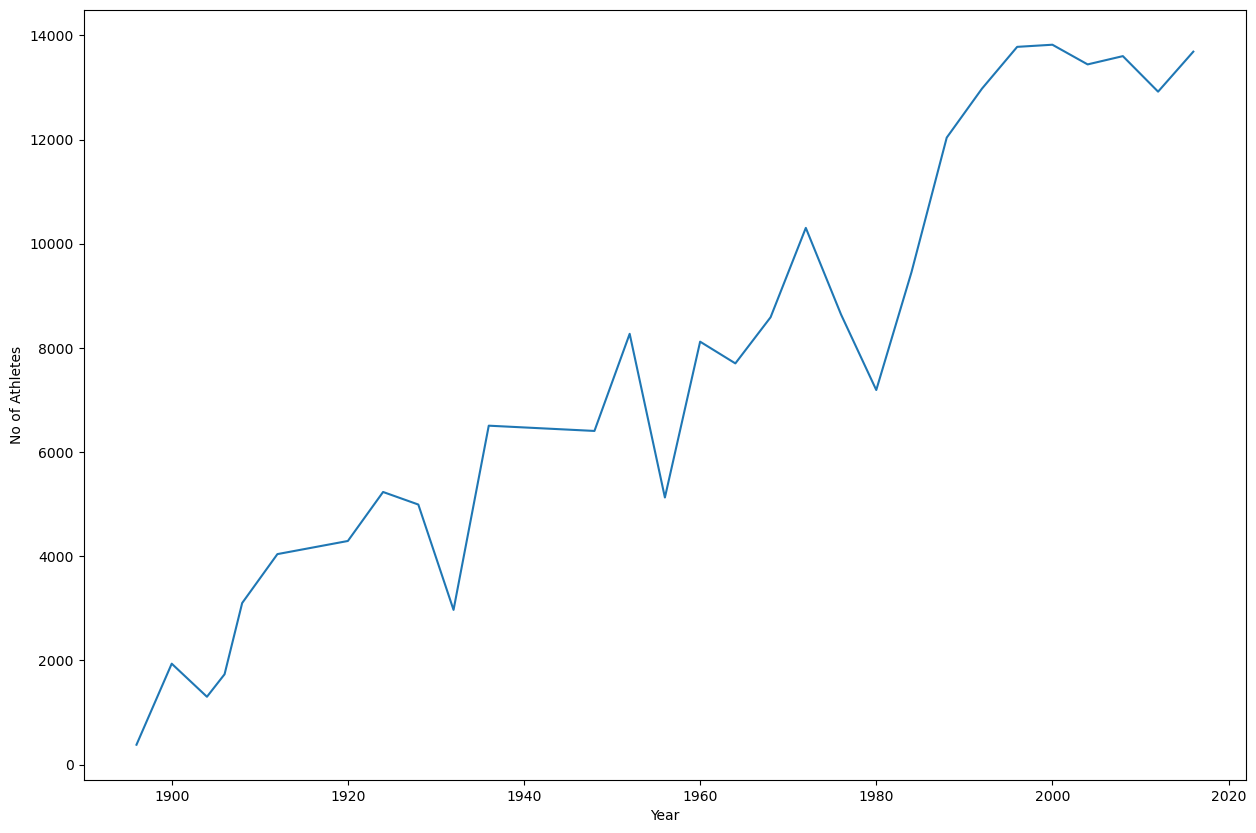

In [55]:
# Atheletes Participated in Summer Olympics
athletes_per_year = df_merged[df_merged['Season']=='Summer'].groupby('Year')['ID'].count().reset_index()

plt.figure(figsize=(15, 10))
sns.lineplot(data=athletes_per_year, x="Year", y="ID")
plt.xlabel('Year')
plt.ylabel('No of Athletes')
plt.show()

<a id='section-3.9'></a>
<h3 style="color:#F20707;">Total Number of Female Athletes in Summer Olympics</h3>

In [56]:
# total number of female athletes in summer olympics
female_participants = df_merged[(df_merged['Sex'] == 'F') & (df_merged['Season'] == 'Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


Let's look at this graphically to get a better understanding about it.

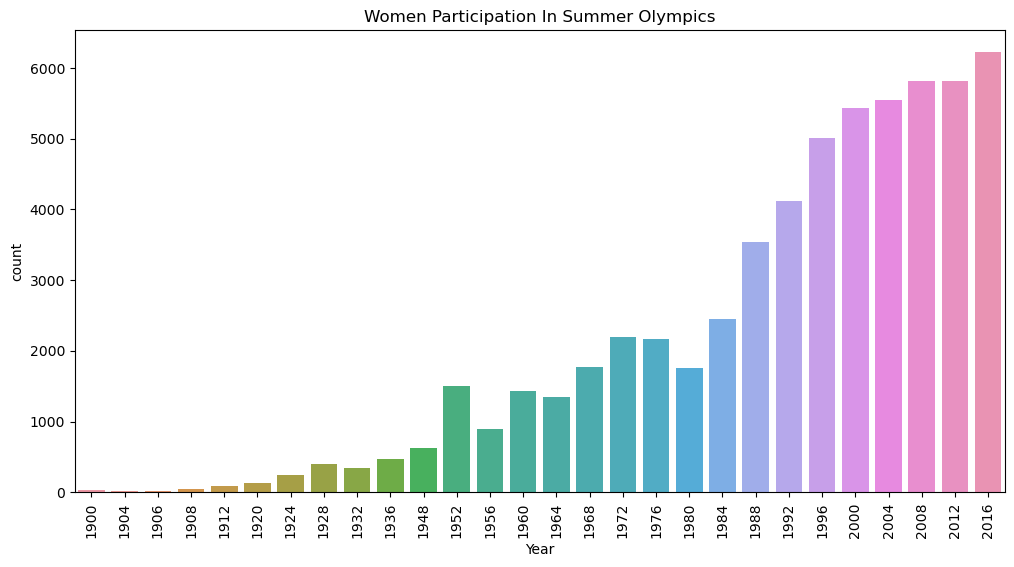

In [57]:
# female athletes in summer olympics
women_olympics = df_merged[(df_merged['Sex'] == 'F') & (df_merged['Season'] == 'Summer')]

# count plot for women participation
plt.figure(figsize=(12,6))
sns.countplot(x='Year',data=women_olympics)
plt.title('Women Participation In Summer Olympics')
plt.xticks(rotation=90)
plt.show()

<a id='section-3.10'></a>
<h3 style="color:#F20707;">Analysis of Gold Medalist</h3>

In [58]:
# Gold medal athletes
goldMedals = df_merged[df_merged['Medal'] == 'Gold']
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [59]:
# gold medalist where age is not null
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [60]:
# Gold beyond 60
goldMedals[goldMedals['Age'] > 60]['ID'].count()

6

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [61]:
# participation of gold medalist over 60 years in different sports
sporting_event = goldMedals[goldMedals['Age'] > 60]['Sport']
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

In [62]:
# plot for sporting event

plt.figure(figsize=(12,6))
sns.countplot(sporting_event)
plt.title('Gold Medal for athlete over 60 years')
plt.show()

KeyError: 0

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Gold medal for each country
goldMedals.region.value_counts().reset_index(name='Medal').head()

In [ ]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head()


sns.catplot(x='index',y='Medal',data=totalGoldMedals,
           height=5,kind='bar')
plt.xlabel('Top 5 Countries')
plt.ylabel('Number of Gold Medals')
plt.title('Gold Medals per Country')
plt.show()

In [63]:
# gold medals for USA
goldMedals_USA = goldMedals.loc[goldMedals['NOC'] == 'USA']

In [64]:
goldMedals_USA.Event.value_counts().reset_index(name='Medal').head(20)

,Event,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,107
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

<a id='section-3.12'></a>
<h3 style="color:#F20707;">Distribution of Height and Weight of Male and Female Athelete over Time in both Seasons</h3>

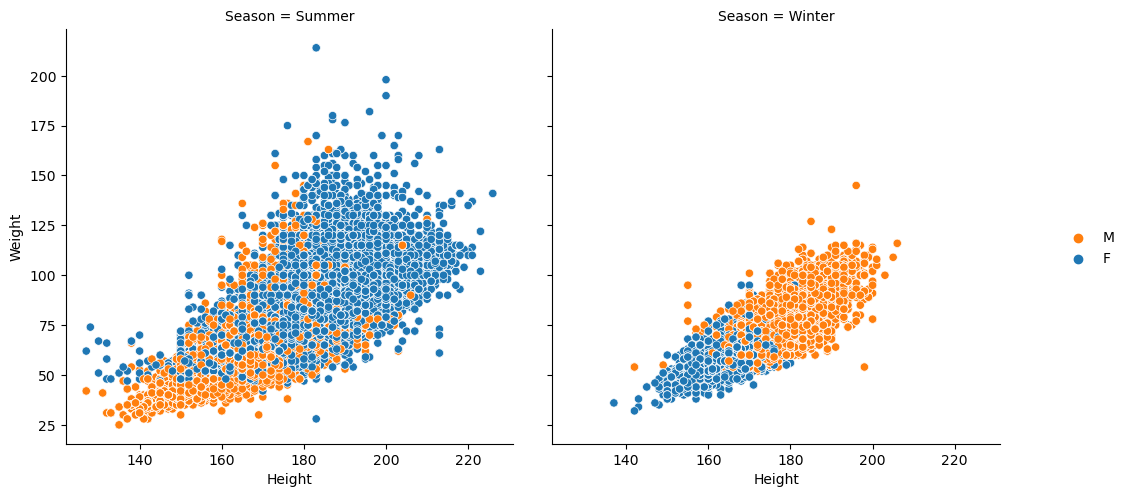

In [65]:
merged_df_cleaned = df_merged[(df_merged['Height'].notnull()) & (df_merged['Weight'].notnull())]

g = sns.FacetGrid(merged_df_cleaned,col="Season")
g.map(sns.scatterplot, "Height", "Weight","Sex")
g.add_legend()
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

# Data cleaning

In [10]:
df_merged.shape

(271116, 17)

In [11]:
df_merged.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [12]:
# Dropping features which do not make any sense to predict medals
data = df_merged.copy()
data.drop(['ID','Name','Games','region','notes'],axis=1,inplace=True)

In [13]:
# Binary Encoding for Medal
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

In [14]:
data.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [15]:
# groupby for medal and gender then calculate mean for numerical features
numeric_data = data.select_dtypes(include=[np.number])

# Group by 'Medal' and 'Sex' and calculate the mean
grouped_mean = numeric_data.groupby([data['Medal'], data['Sex']]).mean().astype(int)

print(grouped_mean)

           Age  Height  Weight  Year  Medal
Medal Sex                                  
0     F     23     167      59  1992      0
      M     26     178      75  1974      0
1     F     24     170      63  1992      1
      M     26     181      79  1966      1


In [16]:
# list of columns with null values
missing_values_columns = [col for col in data.columns if data.isnull().sum()[col] > 0]
missing_values_columns

['Age', 'Height', 'Weight']

In [17]:
def fill_missing_values(data, missing_values_columns):
    df = data.copy()
    # Substitute missing values using the specified condition
    for col in missing_values_columns:
        # Ensure that the column is numeric before applying the fillna and astype methods
        if df[col].dtype.kind in 'iufc':  # 'i' for integer, 'u' for unsigned integer, 'f' for float, 'c' for complex
            df[col] = df.groupby(['Medal', 'Sex'])[col].transform(lambda x: x.fillna(x.mean())).astype(np.int_)
        else:
            print(f"Column {col} is not numeric and cannot be processed.")

    return df

In [18]:
# function for missing values substitution
'''
def fill_missing_values(data,missing_values_columns):
    df = data.copy()
    ''''''substitute missing values using the above condition-
    for example: height for female medalist is 170''''''
    for col in missing_values_columns:
        df[col] = df.groupby(['Medal', 'Sex'])[col].apply(lambda x: x.fillna(x.mean()).astype(np.int_))

    return df
'''

data = fill_missing_values(data,missing_values_columns)

In [19]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

<a id='section-5'></a>
<h1 style="color:#347347;">Feature Engineering</h1>

In [20]:
# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in data.columns if data.dtypes[col] == 'object']

# creating list of numerical columns to standardized data
numerical_columns = [col for col in data.columns if ((data.dtypes[col] != 'object') & (col not in ['Medal','Year']))]

print('Numerical Features are : ',numerical_columns)
print('\n')
print('Categorical Features are : ',categorical_columns)

Numerical Features are :  ['Age', 'Height', 'Weight']


Categorical Features are :  ['Sex', 'Team', 'NOC', 'Season', 'City', 'Sport', 'Event']


In [21]:
# checking unique categories in categorical features for binary and onehot encoding

unique_categories = {col: len(data[col].unique()) for col in data.select_dtypes('object').columns}
unique_categories

{'Sex': 2,
 'Team': 1184,
 'NOC': 230,
 'Season': 2,
 'City': 42,
 'Sport': 66,
 'Event': 765}

### OneHotEncoding for Categorical Features

In [22]:
# one hot encoding function for categorical features
def onehot_encoder(data, cols):
    df = data.copy()
    for col in cols:
        dummies = pd.get_dummies(df[col],drop_first=True)
        # concatenating dummies and original dataframe
        df = pd.concat([df, dummies], axis=1)

        # dropping original coolumns for which encoding is applied.*
        df.drop(col, axis=1,inplace=True)
    return df

In [23]:
# applying onehot encoding on features with more than 2 categories
data = onehot_encoder(
    data,
    cols = ['Team', 'NOC', 'City', 'Sport', 'Event']
)

### Binary Encoding for Categorical Features

In [24]:
# Binary encoding function for categorical features
def binary_encoder(data, columns, positive_values):
    df = data.copy()
    for col, positive_value in zip(columns, positive_values):
        df[col] = df[col].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [25]:
# applying Binary encoding on features with 2 categories
data = binary_encoder(
    data,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

<a id='section-6'></a>
<h1 style="color:#347347;">Model Building</h1>

In [30]:
# Split dataframe into dependent(y) and indepedent variables(X)
X = data.drop('Medal',axis=1)
y = data['Medal']

In [31]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [32]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [28]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))


Class Distribution (Positive to Negative): 14.7% / 85.3%


In [37]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
5423/5423 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8641 - auc: 0.7660 - loss: 0.3557 - val_accuracy: 0.8865 - val_auc: 0.8476 - val_loss: 0.2963
Epoch 2/100
5423/5423 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8947 - auc: 0.8726 - loss: 0.2731 - val_accuracy: 0.8993 - val_auc: 0.8690 - val_loss: 0.2714
Epoch 3/100
5423/5423 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9070 - auc: 0.9006 - loss: 0.2434 - val_accuracy: 0.9071 - val_auc: 0.8810 - val_loss: 0.2581
Epoch 4/100
5423/5423 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9172 - auc: 0.9209 - loss: 0.2163 - val_accuracy: 0.9121 - val_auc: 0.8874 - val_loss: 0.2494
Epoch 5/100
5423/5423 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9228 - auc: 0.9323 - loss: 0.2017 - val_accuracy: 0.9149 - val_auc: 0.8944 - val_loss: 0.2431
Epoch 6/100
5423/5423 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9278 - auc: 0.9434 - loss: 0.1863 - val_accuracy: 0.9165 - val_auc: 0.8965 - val_loss: 0.2473
Epoch 7/100
5423

#End

In [38]:
model.evaluate(X_test, y_test)

1695/1695 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9219 - auc: 0.9031 - loss: 0.2363


[0.23777389526367188, 0.9219717979431152, 0.9029606580734253]

In [40]:
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test) >= 0.5, dtype=np.int_))

1695/1695 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
# Predict
y_pred = rf.predict(X_test)

In [41]:
print("Classification Report:\n\n", classification_report(y_true, y_pred))


Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.98      0.96     46256
           1       0.85      0.57      0.68      7968

    accuracy                           0.92     54224
   macro avg       0.89      0.78      0.82     54224
weighted avg       0.92      0.92      0.92     54224



In [42]:
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))



Confusion Matrix:
 [[45463   793]
 [ 3438  4530]]
